In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%pylab inline

df = pd.read_csv('~/Documents/Repository/Capstone-1_WorldBank_GenderData/wrangled_data.csv')

Populating the interactive namespace from numpy and matplotlib


In [4]:
df2015 = df[df.year == 2015]

In [5]:
df2000 = df[df.year == 2000]

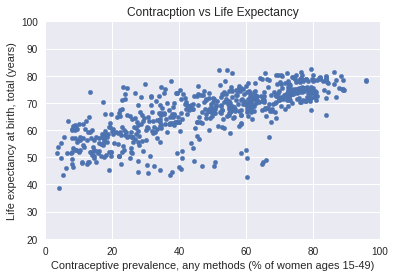

In [6]:
df.plot(x='Contraceptive prevalence, any methods (% of women ages 15-49)', y= 'Life expectancy at birth, total (years)', kind = 'scatter', title = 'Contracption vs Life Expectancy', xlim = (0, 100), ylim = (20,100))

[(0, 100)]

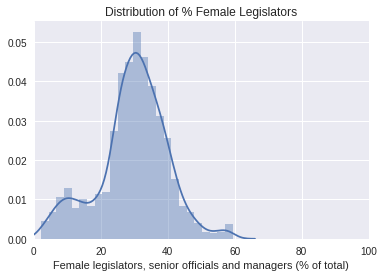

In [17]:
#distribution plot to look at % of female legistators
legi = sns.distplot(df['Female legislators, senior officials and managers (% of total)'].dropna(), bins=25)
sns.plt.title('Distribution of % Female Legislators')
legi.set(xlim=(0, 100))

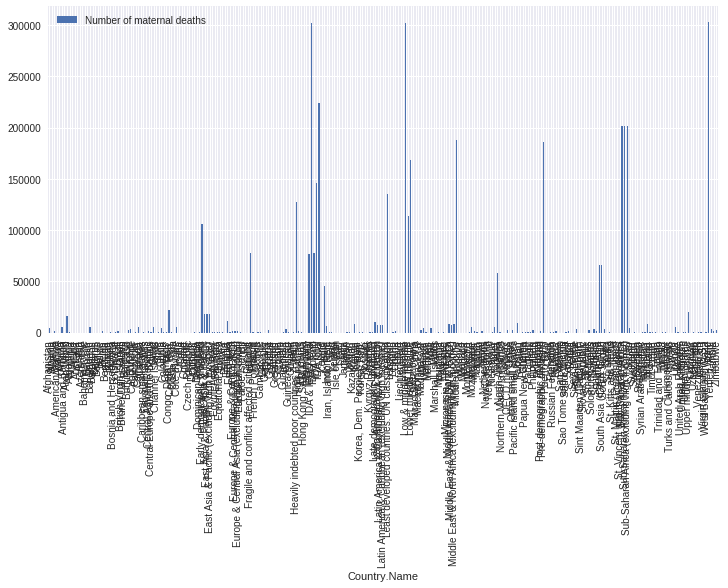

In [11]:
#bar plot of Maternal deaths in 2015
df2015.plot(x= 'Country.Name', y='Number of maternal deaths', kind = 'bar', figsize=(12,6))

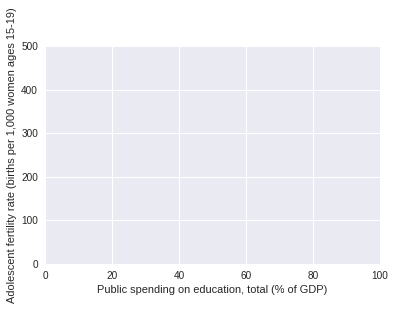

In [15]:
#scatter plot to look at Public education spending vs Teen pregnancy rates
df2015.plot( x='Public spending on education, total (% of GDP)', y= 'Adolescent fertility rate (births per 1,000 women ages 15-19)', kind = 'scatter', xlim = (0,100), ylim= (0, 500))    

In [14]:
#attempt to filter df to just columns 'year' and 'Female completion of Bachelors degree' to look at how this has changed over time
femed = df.[['year','Educational attainment, competed at least Bachelor\'s or equivalent, population 25+, female (%) (cumulative)']]


SyntaxError: invalid syntax (<ipython-input-14-937c380ebcb8>, line 1)

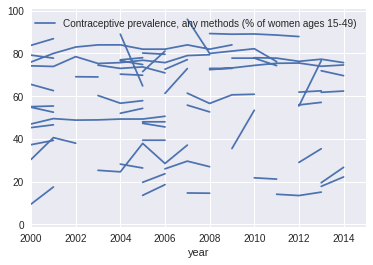

In [18]:
df.plot(x='year', y = 'Contraceptive prevalence, any methods (% of women ages 15-49)')